In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 175s 1us/step


In [5]:
x_train[0].shape

(32, 32, 3)

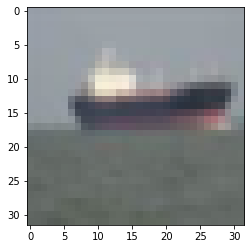

In [6]:
plt.imshow(x_train[69])

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten

In [10]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (4,4), input_shape = (32,32,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32,kernel_size = (4,4), input_shape = (32,32,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.compile(loss = "categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience = 2)

In [13]:
model.fit(x_train,y_cat_train,epochs=20,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 38s 753us/sample - loss: 1.4944 - accuracy: 0.4624 - val_loss: 1.3102 - val_accuracy: 0.5408
Epoch 2/20
50000/50000 [==============================] - 41s 825us/sample - loss: 1.1655 - accuracy: 0.5877 - val_loss: 1.1298 - val_accuracy: 0.6027
Epoch 3/20
50000/50000 [==============================] - 46s 917us/sample - loss: 1.0151 - accuracy: 0.6473 - val_loss: 1.0111 - val_accuracy: 0.6481
Epoch 4/20
50000/50000 [==============================] - 41s 814us/sample - loss: 0.9082 - accuracy: 0.6830 - val_loss: 1.0253 - val_accuracy: 0.6472
Epoch 5/20
50000/50000 [==============================] - 44s 871us/sample - loss: 0.8193 - accuracy: 0.7157 - val_loss: 0.9298 - val_accuracy: 0.6816
Epoch 6/20
50000/50000 [==============================] - 39s 778us/sample - loss: 0.7432 - accuracy: 0.7396 - val_loss: 0.9614 - val_accuracy: 0.6722
Epoch 7/20
50000/50000 [====================

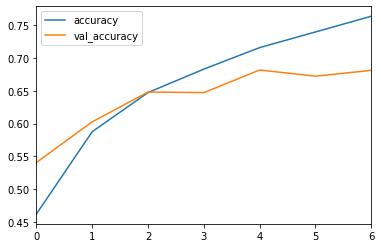

In [14]:
metrics = pd.DataFrame(model.history.history)
metrics[["accuracy","val_accuracy"]].plot()

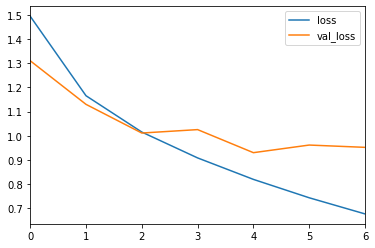

In [15]:
metrics[["loss","val_loss"]].plot()

In [16]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9518692839622498, 0.6811]

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
predictions = model.predict_classes(x_test)

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1000
           1       0.81      0.79      0.80      1000
           2       0.62      0.56      0.59      1000
           3       0.49      0.44      0.46      1000
           4       0.70      0.58      0.63      1000
           5       0.47      0.72      0.57      1000
           6       0.82      0.73      0.77      1000
           7       0.81      0.69      0.75      1000
           8       0.79      0.77      0.78      1000
           9       0.76      0.78      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



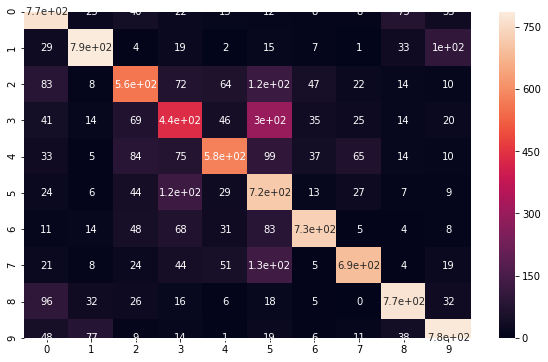

In [22]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)

In [27]:
my_image = x_test[29]

In [28]:
my_image

array([[[0.34509804, 0.50588235, 0.16470588],
        [0.3254902 , 0.54117647, 0.16470588],
        [0.39607843, 0.66666667, 0.21176471],
        ...,
        [0.44313725, 0.61960784, 0.20392157],
        [0.4       , 0.54509804, 0.18039216],
        [0.36078431, 0.48235294, 0.14901961]],

       [[0.36078431, 0.50196078, 0.1254902 ],
        [0.43137255, 0.63921569, 0.27058824],
        [0.51372549, 0.69411765, 0.35294118],
        ...,
        [0.43921569, 0.59215686, 0.15294118],
        [0.41960784, 0.59215686, 0.17254902],
        [0.41568627, 0.61176471, 0.21176471]],

       [[0.44313725, 0.48235294, 0.18431373],
        [0.6627451 , 0.67058824, 0.50588235],
        [0.71372549, 0.69019608, 0.51764706],
        ...,
        [0.34509804, 0.45490196, 0.12941176],
        [0.38823529, 0.50588235, 0.1372549 ],
        [0.41960784, 0.56470588, 0.18039216]],

       ...,

       [[0.25882353, 0.17254902, 0.05882353],
        [0.29019608, 0.21568627, 0.09803922],
        [0.46666667, 0

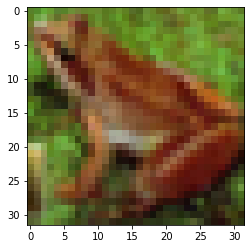

In [29]:
plt.imshow(my_image)

In [30]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([6], dtype=int64)